# Greenhouse Gas Emissions: Reduction Efforts by OECD and Other Major Countries

This project will explore the greenhouse gas (GHG) emissions of OECD member countries and other major countries. It will look at the current GHG emission levels of these countries and analyse the change in levels from 1990 to 2018. It will also identify the countries with the largest reductions in GHG levels over the period and analyse possible factors which contributed to the decreases. 



# Introduction
Climate change is a crucial issue faced by all nations worldwide. The sense of urgency has been emphasised recently as the United Nations Intergovernmental Panel on Climate Change (IPCC) released a report declaring that climate change is “widespread, rapid, and intensifying” (2021), and was described by the UN Secretary-General as a “code red for humanity” (Chestney & Januta, 2021).  At a UN summit in Paris in 2015, governments of 196 nations pledged to alleviate climate change by “[reducing] their Greenhouse Gas emissions” (UNFCCC, 2016). 

Nations have also been taking measures to reduce emissions prior to 2015 (Quince & Phillips, 2015). Two sources of GHG emissions commonly identified are energy use, particularly for electricity, and transport use, particularly the use of cars and road transport (WWF-UK, 2021). Solutions for reducing GHG emissions come in two primary forms: conserving and being more efficient with energy use (Geneva College, 2021), and developing and deploying new technologies including renewable energy and lower-emission and zero-emission vehicles (Niranjan, 2019).

In this report, we will look at how nations have been performing in reducing their greenhouse gas emissions in order to reach targets of “climate neutrality (UNFCCC, 2016). This report shall focus on OECD (The Organisation for Economic Co-operation and Development) countries with BRIICS countries (Brazil, Russia, India, Indonesia, China, South Africa) as these nations have historically and recently been major contributors to GHG emissions (OECD, 2021b). 




## Questions to be Answered

This analysis aims to answer the following questions:

I.	Overall and per capita, which OECD and other major countries have the highest GHG emissions? Which have the lowest?

II.	How strong are the correlations of population and GDP with GHG emissions?

III.	Do GHG emissions correlate with land size and population density?

IV.	Are there any general trends that lower per-capita emitters of GHG exhibit in their end use of energy (transport, industry, etc.)?

V.	Which countries have had the largest GHG emission reductions from 1990 to 2018?

VI.	Do either energy conservation or renewable energy use correlate with reduced GHG emissions?

VII.	Do either reduced road use or increased efficiency (lower fuel consumption) of vehicles correlate with reduced GHG emissions? 

VIII.	Of these efforts in Questions VI and VII, which were used by the countries with the largest reductions in GHG emissions?

## Data to Use

1.	OECD Greenhouse Gas Emissions (OECD_emissions.csv)

This data is sourced from the OECD.stat website (2021a). It contains GHG emission data for OECD and BRIICS countries from 1990 to 2018. This emission data will serve as the basis of the analysis in this report.

2.	World Bank Population, Land Area and GDP Data (WorldBank_BasicInfo.csv)

This data is sourced from the World Bank data website (2021). It includes basic population, land area, and GDP information for the countries concerned corresponding to the years of the OECD.stat data.

3.	Our World in Data Per Capita Energy Use (OWID_per-capita-energy-use.csv)

This data comes from the University of Oxford’s Our World in Data project and is compiled using data from the BP Statistical Review of World Energy, the Shift Project, the Maddison Project Database, and UN Population Prospects (Ritchie & Roser, 2020). It measures the use of primary energy per person in kilowatt-hours (kWh). 

4.	Our World in Data Per Capita Energy Consumption from Renewables (OWID_per-capita-renewables.csv)

This data is also sourced from Our World in Data, based on the BP Statistical Review of World Energy (Ritchie & Roser, 2020). It measures the use of energy per person in kWh coming from renewable energy, including wind, solar, geothermal, biomass, and other sources (BP, 2021, p. 57). 

5.	OECD ITF Transport Equipment Data (OECD_ITF_equipment.csv)

This data is sourced from the OECD.stat website based on data compiled by the International Transport Forum, as well as Eurostat and the UNECE (OECD, 2021c). The statistic used here is the number of road motor vehicles per one thousand inhabitants of a country. This data is annual, going back to the year 2000.





# Analysis

This analysis will primarily utilise the Python libraries Pandas and Pyplot. It will also use Geopandas, Seaborn, and Numpy. We shall begin by first importing the necessary modules.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np

## I.	Overall and per capita, which OECD and other major countries have the highest GHG emissions? Which have the lowest?

First, we will check the levels of GHG emissions in each country concerned, both on a total and per capita basis.

### Data Preparation

Before we start answering the first question, we will first load the primary data, the OECD Greenhouse Gas Emissions data, and inspect it.

First, let's load the data into a dataframe and view the columns.

In [2]:
oecd_emissions = pd.read_csv("OECD_emissions.csv",encoding='UTF8')
oecd_emissions.head()


,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,424998.381,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,426015.210,NaN,NaN
2,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430216.380,NaN,NaN
3,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1993,1993,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430612.556,NaN,NaN
4,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1994,1994,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430653.332,NaN,NaN


Let's look at the unique values of the countries, pollutants, variables, years, and their corresponding codes. 

In [3]:
for i in range(0,7):
    display(oecd_emissions.iloc[:,i].unique())

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'CHL', 'EST', 'ISR', 'RUS', 'SVN', 'LVA',
       'LTU', 'OECD', 'OECDE', 'BRA', 'CHN', 'COL', 'CRI', 'IND', 'IDN',
       'ZAF', 'ARG', 'EU28'], dtype=object)

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States', 'Chile', 'Estonia',
       'Israel', 'Russia', 'Slovenia', 'Latvia', 'Lithuania',
       'OECD - Total', 'OECD - Europe', 'Brazil',
       "China (People's Republic of)", 'Colombia', 'Costa Rica', 'India',
       'Indonesia', 'South Africa', 'Argentina',
       'European Union (28 countries)'], dtype=object)

array(['GHG', 'CO2', 'CH4', 'N2O', 'HFC', 'PFC', 'SF6', 'NF3', 'HFC_PFC'],
      dtype=object)

array(['Greenhouse gases', 'Carbon dioxide', 'Methane', 'Nitrous oxide',
       'Hydrofluorocarbons', 'Perfluorocarbons', 'Sulphur hexafluoride',
       'Nitrogen trifluoride', 'Unspecified mix of HFCs and PFCs'],
      dtype=object)

array(['TOTAL', 'INDEX_1990', 'GHG_CAP', 'WAS', 'IND_PROC', 'ENER', 'AGR',
       'OTH', 'GHG_GDP', 'ENER_IND', 'LULUCF', 'ENER_OSECT', 'ENER_OTH',
       'ENER_FU', 'ENER_MANUF', 'ENER_TRANS', 'INDEX_2000', 'TOTAL_LULU',
       'ENER_CO2', 'AFOLU', 'ENER_IND_P', 'ENER_OTH_P', 'AGR_P', 'ENER_P',
       'ENER_MANUF_P', 'ENER_OSECT_P', 'WAS_P', 'IND_PROC_P',
       'ENER_TRANS_P', 'ENER_FU_P', 'OTH_P', 'ENER_CO2_P'], dtype=object)

array(['Total  emissions excluding LULUCF',
       'Total GHG excl. LULUCF, Index 1990=100',
       'Total GHG excl. LULUCF per capita', '5 - Waste',
       '2- Industrial processes and product use', '1 - Energy',
       '3 - Agriculture', '6 - Other',
       'Total GHG excl. LULUCF per unit of GDP',
       '1A1 - Energy Industries',
       'Land use, land-use change and forestry (LULUCF)',
       '1A4 - Residential and other sectors', '1A5 - Energy - Other',
       '1B - Fugitive Emissions from Fuels',
       '1A2 - Manufacturing industries and construction',
       '1A3 - Transport', 'Total GHG excl. LULUCF, Index 2000=100',
       'Total  emissions including LULUCF',
       '1C - CO2 from Transport and Storage',
       'Agriculture, Forestry and Other Land Use (AFOLU)',
       '1A4 - Residential and other sectors\t'], dtype=object)

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

For the purposes of this analysis, we will just focus on greenhouse gases as a whole.

In [4]:
oecd_emissions = oecd_emissions[oecd_emissions['POL'] == 'GHG']

Next, we will check that there are no text or null values in the data. 

In [5]:
def value_check(df_name, col_name):
    #Function to check whether there is text or null values in a given column.
    nullcheck = df_name[df_name[col_name].isnull() == True]
    stringcheck = pd.to_numeric(df_name[col_name],errors='coerce')
    stringcheck = stringcheck[stringcheck.isnull() == True]
    error_rows = stringcheck.index.values.tolist() + nullcheck.index.values.tolist()
    return df_name.loc[error_rows]
    
display(value_check(oecd_emissions,'Value'))

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags


It appears that there are no missing cells. However, the structure of this data could mean that there could be some countries where not all data is for 2018. 
The first questions in particular will focus on the latest data available, so let's get the latest year and put it in a dataframe.

In [6]:
latest_data = oecd_emissions[oecd_emissions['VAR'] == 'TOTAL'].\
    pivot_table(index = ['COU','Country'],values = 'Year',aggfunc='max').reset_index()
display(latest_data)

,COU,Country,Year
0,ARG,Argentina,2014
1,AUS,Australia,2018
2,AUT,Austria,2018
3,BEL,Belgium,2018
4,BRA,Brazil,2012
5,CAN,Canada,2018
6,CHE,Switzerland,2018
7,CHL,Chile,2016
8,CHN,China (People's Republic of),2012
9,COL,Colombia,2014


While the OECD average might be good to look at, we will remove the EU and OECD-Europe rows for our purposes.

In [7]:
latest_data = latest_data.drop([16,38]).reset_index(drop=True)
display(latest_data)

,COU,Country,Year
0,ARG,Argentina,2014
1,AUS,Australia,2018
2,AUT,Austria,2018
3,BEL,Belgium,2018
4,BRA,Brazil,2012
5,CAN,Canada,2018
6,CHE,Switzerland,2018
7,CHL,Chile,2016
8,CHN,China (People's Republic of),2012
9,COL,Colombia,2014


For the first questions, we would like to show the data on a world map, so we will import the world map from GeoPandas.

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


One pitfall of this "naturalearth_lowres" data is that some country codes are not proper (Iorifan, 2021). This includes France. Let's solve that first. 

The Turkish Republic of Northern Cyprus does not have globally accepted recognition (Deutsche Welle, 2021) and therefore does not have an ISO code (ISO, 2021). Since this is not in the scope of our analysis, we will leave it as is.

In [9]:
display(world[world['iso_a3'] == '-99'][['iso_a3','name']])

world.loc[world['name'] == 'Norway', 'iso_a3'] = 'NOR'
world.loc[world['name'] == 'France', 'iso_a3'] = 'FRA'
world.loc[world['name'] == 'Somaliland', 'iso_a3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso_a3'] = 'RKS'

display(world[world['iso_a3'] == '-99'][['iso_a3','name']])

,iso_a3,name
21,-99,Norway
43,-99,France
160,-99,N. Cyprus
167,-99,Somaliland
174,-99,Kosovo


,iso_a3,name
160,-99,N. Cyprus


### Analysis

For the first question, we will place the appropriate total GHG and the per capita GHG data on the Latest Data table. 

In [10]:
latest_data = pd.merge(latest_data,oecd_emissions[oecd_emissions['VAR'] == 'TOTAL'][['COU','Year','Value']],how='left',on=['COU','Year'])
latest_data = pd.merge(latest_data,oecd_emissions[oecd_emissions['VAR'] == 'GHG_CAP'][['COU','Year','Value']],how='left',on=['COU','Year'])

latest_data = latest_data.rename(columns={"Value_x":"Total GHG (CO2e, kt)", "Value_y":"GHG Per Capita (CO2e, t)"})

display(latest_data)

,COU,Country,Year,"Total GHG (CO2e, kt)","GHG Per Capita (CO2e, t)"
0,ARG,Argentina,2014,3.225546e+05,7.504
1,AUS,Australia,2018,5.580472e+05,22.413
2,AUT,Austria,2018,7.895034e+04,8.879
3,BEL,Belgium,2018,1.184557e+05,10.316
4,BRA,Brazil,2012,1.027739e+06,5.124
5,CAN,Canada,2018,7.293493e+05,19.672
6,CHE,Switzerland,2018,4.633251e+04,5.435
7,CHL,Chile,2016,1.116775e+05,6.133
8,CHN,China (People's Republic of),2012,1.189576e+07,8.650
9,COL,Colombia,2014,1.506148e+05,3.169


Now, the data will be plotted onto maps.

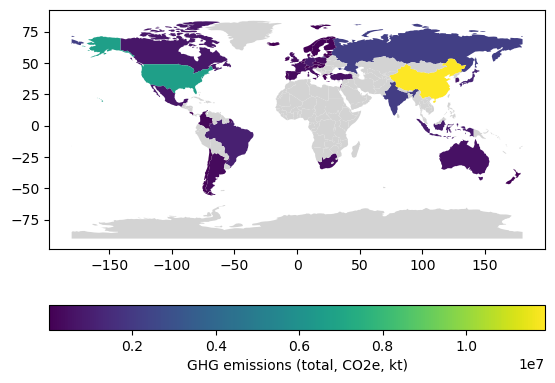

In [11]:
world_stat = pd.merge(world,latest_data,how='left',left_on='iso_a3',right_on='COU')

world_stat.plot(column = 'Total GHG (CO2e, kt)',
 legend=True,
 legend_kwds={'label': "GHG emissions (total, CO2e, kt)",'orientation': "horizontal"},
 missing_kwds={"color": "lightgrey"}
)
plt.show()

With the exception of the major economies such as the US, China, and Russia, most countries appear to be around or below the 200 million ton mark for total GHG emissions.

Let's look at the per capita data now.

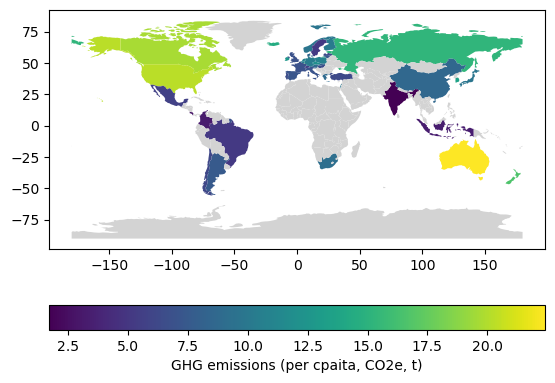

In [12]:

world_stat.plot(column = 'GHG Per Capita (CO2e, t)',
 legend=True,
 legend_kwds={'label': "GHG emissions (per cpaita, CO2e, t)",'orientation': "horizontal"},
 missing_kwds={"color": "lightgrey"}
)
plt.show()

Per capita, the results get more interesting. Australia seems to have the highest emissions per capita, followed by the US and Canada. 

Let's sort the table by GHG per capita to get a better picture.  

In [13]:
percapita_table = latest_data.sort_values(by='GHG Per Capita (CO2e, t)',ascending=False).reset_index(drop=True)

display(percapita_table)

,COU,Country,Year,"Total GHG (CO2e, kt)","GHG Per Capita (CO2e, t)"
0,AUS,Australia,2018,5.580472e+05,22.413
1,USA,United States,2018,6.676650e+06,20.290
2,CAN,Canada,2018,7.293493e+05,19.672
3,LUX,Luxembourg,2018,1.054716e+04,17.455
4,NZL,New Zealand,2018,7.886229e+04,16.627
5,RUS,Russia,2018,2.220123e+06,15.220
6,EST,Estonia,2018,1.997414e+04,15.099
7,ISL,Iceland,2018,4.856954e+03,14.425
8,KOR,Korea,2016,6.940660e+05,13.614
9,IRL,Ireland,2018,6.093454e+04,12.645


Indeed, the US, Australia, and Canada are the top per capita emitters, while India, Costa Rica, and Colombia are the lowest emitters. A look at this table would suggest that GDP (gross domestic product) per capita, or the relative wealth of a nation, plays a significant role in GHG emissions. One other observation is that, with some exceptions, countries which are large in physical land size also seem to float to the top, whereas the bottom half has many physically smaller countries. A cursory glance suggests there may be a weak correlation; we shall explore that later.

## II.	How strong are the correlations of population and GDP with GHG emissions?
Population and economic activity have been long understood as major contributors to GHG emissions (Dietz & Rosa, 1997). Here, we would like to compare the correlation of these two factors and see whether population or GDP has a greater influence. 


### Data Preparation
We must first import and prepare the data on population, land area, and GDP data from the World Bank.  

In [14]:
wb_stats = pd.read_csv("WorldBank_BasicInfo.csv",encoding="UTF-8")
wb_stats = wb_stats.rename(columns={"Country Code": "COU"}) #Change column name to make merging easier. 

display(value_check(wb_stats,'1990'))  #Check for string and null values. 

,Country Name,COU,Series Name,Series Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
77,Estonia,EST,GDP (current US$),NY.GDP.MKTP.CD,..,..,..,..,..,4497823761,...,1.974411e+10,1.968504e+10,2.339484e+10,2.319271e+10,2.527141e+10,2.677347e+10,2.304886e+10,2.425955e+10,2.688508e+10,3.061618e+10
78,Estonia,EST,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,..,..,..,3130.806984,...,1.479497e+04,1.478438e+04,1.762404e+04,1.753442e+04,1.917410e+04,2.036710e+04,1.752223e+04,1.843725e+04,2.040793e+04,2.315939e+04
107,Hungary,HUN,GDP (current US$),NY.GDP.MKTP.CD,..,34753569693,38730585922,40124916941,43166678735,46425677734,...,1.310000e+11,1.320000e+11,1.420000e+11,1.280000e+11,1.350000e+11,1.410000e+11,1.250000e+11,1.280000e+11,1.430000e+11,1.600000e+11
108,Hungary,HUN,GDP per capita (current US$),NY.GDP.PCAP.CD,..,3350.258323,3735.10582,3873.987723,4173.373024,4494.707624,...,1.304648e+04,1.319162e+04,1.421617e+04,1.295069e+04,1.368751e+04,1.426701e+04,1.270689e+04,1.309051e+04,1.460585e+04,1.641144e+04
122,Israel,ISR,GDP (current US$),NY.GDP.MKTP.CD,..,..,..,..,..,1.01E+11,...,2.070000e+11,2.340000e+11,2.610000e+11,2.570000e+11,2.930000e+11,3.100000e+11,3.000000e+11,3.190000e+11,3.530000e+11,3.700000e+11
123,Israel,ISR,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,..,..,..,18166.79961,...,2.771979e+04,3.069417e+04,3.361069e+04,3.251035e+04,3.631648e+04,3.773842e+04,3.581371e+04,3.728253e+04,4.047467e+04,4.170483e+04
142,Lithuania,LTU,GDP (current US$),NY.GDP.MKTP.CD,..,..,..,..,..,7867140395,...,3.738812e+10,3.712869e+10,4.353505e+10,4.292745e+10,4.652342e+10,4.853366e+10,4.141887e+10,4.301809e+10,4.764077e+10,5.369665e+10
143,Lithuania,LTU,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,..,..,..,2167.792582,...,1.182078e+04,1.198751e+04,1.437695e+04,1.436771e+04,1.572965e+04,1.655102e+04,1.425823e+04,1.499813e+04,1.684370e+04,1.916681e+04
145,Luxembourg,LUX,Land area (sq. km),AG.LND.TOTL.K2,..,..,..,..,..,..,...,2.430000e+03,2.430000e+03,2.430000e+03,2.430000e+03,2.430000e+03,2.430000e+03,2.430000e+03,2.430000e+03,2.430000e+03,2.430000e+03
149,Luxembourg,LUX,Population density (people per sq. km of land ...,EN.POP.DNST,..,..,..,..,..,..,...,2.048490e+02,2.086226e+02,2.133115e+02,2.184963e+02,2.236049e+02,2.289379e+02,2.344049e+02,2.395119e+02,2.454058e+02,2.501852e+02


It appears that missing data is marked by text (".."). We will replace this with null values.

In [15]:
wb_stats = wb_stats.replace('..',np.nan)

value_check(wb_stats,'1990').head()

,Country Name,COU,Series Name,Series Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
77,Estonia,EST,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,4497823761,...,1.974411e+10,1.968504e+10,2.339484e+10,2.319271e+10,2.527141e+10,2.677347e+10,2.304886e+10,2.425955e+10,2.688508e+10,3.061618e+10
78,Estonia,EST,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,3130.806984,...,1.479497e+04,1.478438e+04,1.762404e+04,1.753442e+04,1.917410e+04,2.036710e+04,1.752223e+04,1.843725e+04,2.040793e+04,2.315939e+04
107,Hungary,HUN,GDP (current US$),NY.GDP.MKTP.CD,NaN,34753569693,38730585922,40124916941,43166678735,46425677734,...,1.310000e+11,1.320000e+11,1.420000e+11,1.280000e+11,1.350000e+11,1.410000e+11,1.250000e+11,1.280000e+11,1.430000e+11,1.600000e+11
108,Hungary,HUN,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,3350.258323,3735.10582,3873.987723,4173.373024,4494.707624,...,1.304648e+04,1.319162e+04,1.421617e+04,1.295069e+04,1.368751e+04,1.426701e+04,1.270689e+04,1.309051e+04,1.460585e+04,1.641144e+04
122,Israel,ISR,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,1.01E+11,...,2.070000e+11,2.340000e+11,2.610000e+11,2.570000e+11,2.930000e+11,3.100000e+11,3.000000e+11,3.190000e+11,3.530000e+11,3.700000e+11


For the next two questions, we will need the appropriate year's data for population, GDP, GDP per capita, land area, and density. We will import population, GDP, GDP per capita, and land area, then calculate the density (population over land area). In this step, we will also ensure all data is treated as numeric.

In [16]:
to_add = ['Land area (sq. km)','Population, total','GDP (current US$)','GDP per capita (current US$)']

for series in to_add: #Loop through each data series
    latest_data[series] = "" #Create column for each data series
    for row in range(0,len(latest_data.index)): #Loop through each row of latest data column. 
        #Get the value for each country in the appropriate year. 
        year = str(latest_data.at[row,'Year'])
        target = wb_stats[(wb_stats['COU'] == latest_data.at[row,'COU']) & (wb_stats['Series Name'] == series)][year]
        try:
            target = target.values[0]
        except:
            target = np.nan
        latest_data.at[row,series] = target
    latest_data[series] = pd.to_numeric(latest_data[series],errors='coerce') #Ensure all given data is numeric.
        
latest_data["Density (pop/km2)"] = latest_data["Population, total"] / latest_data["Land area (sq. km)"]
display(value_check(latest_data,'Land area (sq. km)' or 'Population, total' or 'GDP (current US$)' or 'GDP per capita (current US$)')) #check for nulls or text
latest_data.head()

,COU,Country,Year,"Total GHG (CO2e, kt)","GHG Per Capita (CO2e, t)",Land area (sq. km),"Population, total",GDP (current US$),GDP per capita (current US$),Density (pop/km2)


,COU,Country,Year,"Total GHG (CO2e, kt)","GHG Per Capita (CO2e, t)",Land area (sq. km),"Population, total",GDP (current US$),GDP per capita (current US$),Density (pop/km2)
0,ARG,Argentina,2014,322554.612,7.504,2736690.0,42669500.0,5.260000e+11,12334.79825,15.591645
1,AUS,Australia,2018,558047.220,22.413,7692020.0,24982688.0,1.430000e+12,57354.96405,3.247871
2,AUT,Austria,2018,78950.336,8.879,82520.0,8840521.0,4.550000e+11,51453.14702,107.131859
3,BEL,Belgium,2018,118455.738,10.316,30280.0,11427054.0,5.430000e+11,47554.74631,377.379590
4,BRA,Brazil,2012,1027739.000,5.124,8358140.0,199287292.0,2.470000e+12,12370.02445,23.843498


### Analysis

Now, we will plot GHG emissions on graphs, comparing the levels of countries to their population and GDP. Due to the differences in scale amongst countries, the plots will employ a logarithmic scale. 
We will also give the Pearson correlation coefficient in a table. 

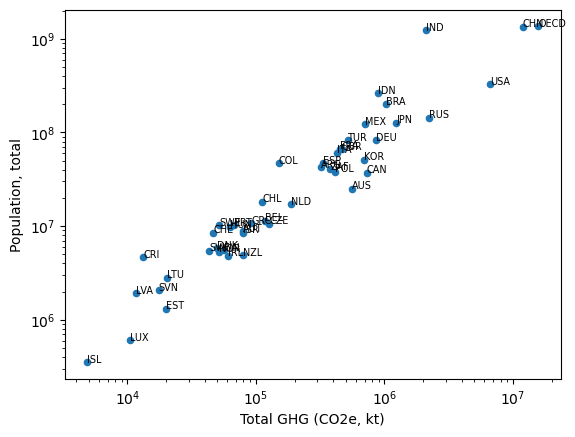

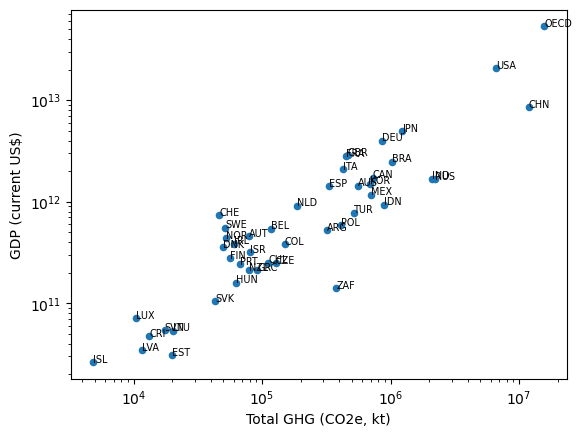

,"Total GHG (CO2e, kt)","Population, total",GDP (current US$)
"Total GHG (CO2e, kt)",1.000000,0.857023,0.878122
"Population, total",0.857023,1.000000,0.659598
GDP (current US$),0.878122,0.659598,1.000000


In [17]:
latest_data_plt = latest_data.set_index('COU')
def plotlabels(df,x_val,y_val): #Function to make plot labels.
    x = df[x_val].tolist()
    y = df[y_val].tolist()
    labels = df.index.tolist()

    for i in range(0,len(labels)):
        plt.text(x[i],y[i],labels[i],fontsize='x-small')
    
    return 0

latest_data_plt.plot(
    kind = 'scatter',
    x = 'Total GHG (CO2e, kt)',
    y = 'Population, total',
    logx = True,
    logy = True,
)

plotlabels(latest_data_plt,'Total GHG (CO2e, kt)','Population, total')
plt.show()

latest_data_plt.plot(
    kind = 'scatter',
    x = 'Total GHG (CO2e, kt)',
    y = 'GDP (current US$)',
    logx = True,
    logy = True,
)

plotlabels(latest_data_plt,'Total GHG (CO2e, kt)','GDP (current US$)')
plt.show()

display(latest_data[['Total GHG (CO2e, kt)','Population, total','GDP (current US$)']].corr())



Both scatterplots suggest strong correlation, and indeed the Pearson coefficients are high for both. GDP, in fact, correlates slightly higher than population does. The numbers are so close, however, that it is safe to say that both population and economic activity correlate with GHG emissions similarly.

Let's drill down on population and analyse the correlation between GHG emissions per capita and GDP per capita. 

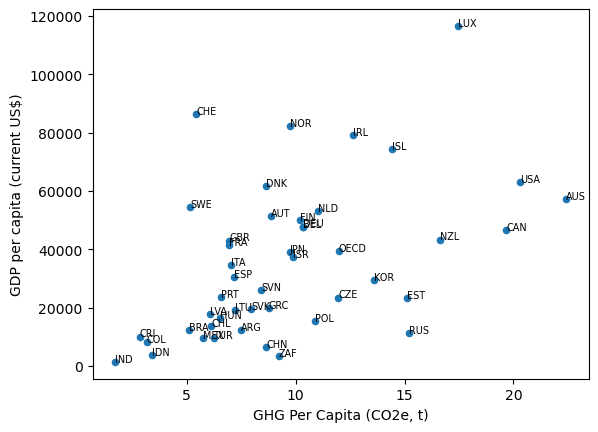

,"GHG Per Capita (CO2e, t)",GDP per capita (current US$)
"GHG Per Capita (CO2e, t)",1.000000,0.490321
GDP per capita (current US$),0.490321,1.000000


In [18]:
latest_data_plt.plot(
    kind = 'scatter',
    x = 'GHG Per Capita (CO2e, t)',
    y = 'GDP per capita (current US$)',
)

plotlabels(latest_data_plt,'GHG Per Capita (CO2e, t)','GDP per capita (current US$)')
plt.show()

display(latest_data[['GHG Per Capita (CO2e, t)','GDP per capita (current US$)']].corr())

Per capita, the correlation between GHG emissions and GDP is considerably lower; it seems to become more inconsistent the higher either GHG or GDP per capita is in a country. This would suggest that the high correlation with GDP is more strongly associated with GDP's correlation with population. 

## III.	Do GHG emissions correlate with land size and population density?

Whereas population and GDP are well known to correlate with GHG emissions (Dietz & Rosa, 1997), less has been said about physical area. While it was impossible to conclude in the previous Question I, there was a tendency for physically larger countries to also cause high emissions. It might be possible that the extra energy required to connect a large nation could impact GHG emissions.


### Data Preparation

Data preparation for this question was performed for Question II.

### Analysis

Let's first look at the correlation between total GHG emissions and the land area (in km2) of the countries concerned.

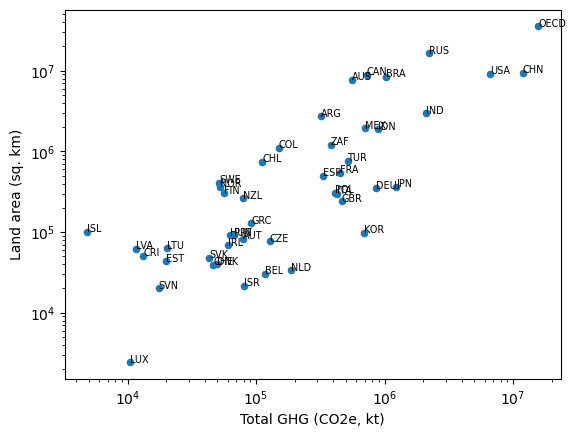

,"Total GHG (CO2e, kt)",Land area (sq. km),"Population, total",GDP (current US$)
"Total GHG (CO2e, kt)",1.000000,0.834366,0.857023,0.878122
Land area (sq. km),0.834366,1.000000,0.661984,0.861152
"Population, total",0.857023,0.661984,1.000000,0.659598
GDP (current US$),0.878122,0.861152,0.659598,1.000000


In [19]:
latest_data_plt.plot(
    kind = 'scatter',
    x = 'Total GHG (CO2e, kt)',
    y = 'Land area (sq. km)',
    logx = True,
    logy = True,
)

plotlabels(latest_data_plt,'Total GHG (CO2e, kt)','Land area (sq. km)')
plt.show()

display(latest_data[['Total GHG (CO2e, kt)','Land area (sq. km)','Population, total','GDP (current US$)']].corr())

Correlation between land area and total GHG is rather strong, only slightly behind population and GDP. 

Let's now drill down on population, and look at the correlation between GHG per capita and population density. 

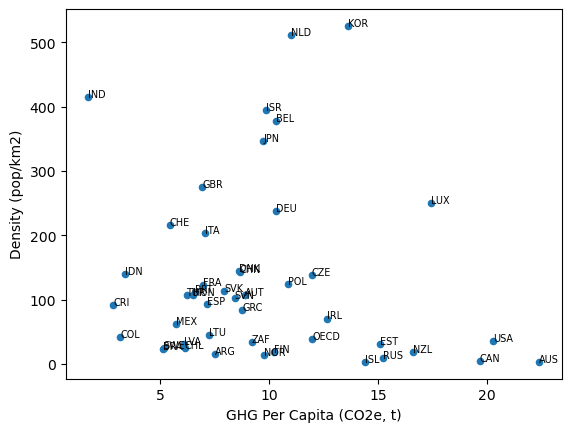

,"GHG Per Capita (CO2e, t)",Density (pop/km2),GDP per capita (current US$)
"GHG Per Capita (CO2e, t)",1.000000,-0.111141,0.490321
Density (pop/km2),-0.111141,1.000000,0.098322
GDP per capita (current US$),0.490321,0.098322,1.000000


In [20]:
latest_data_plt.plot(
    kind = 'scatter',
    x = 'GHG Per Capita (CO2e, t)',
    y = 'Density (pop/km2)',
)

plotlabels(latest_data_plt,'GHG Per Capita (CO2e, t)','Density (pop/km2)')
plt.show()

display(latest_data[['GHG Per Capita (CO2e, t)','Density (pop/km2)','GDP per capita (current US$)']].corr())

GHG per capita appears to have no correlation with population density. While negative numbers are expected as the potential correlation would be inverse, the coefficient is close to zero. The scatter plot is also dispersed. 

From this analysis, it appears that while land area is correlated with total GHG emissions, population density is not correlated with per capita emissions. This would imply in turn that the land area correlation is more to do with physically larger countries generally having larger populations. 

## IV.	Are there any general trends that lower per-capita emitters of GHG exhibit in their end use of energy (transport, industry, etc.)?

For this, we will make profiles of the source of GHG emissions for each country, the data for which is contained in the OECD emissions file. 

### Data Preparation

First, we shall append the data to the table for per capita figures. 
We will only observe nations for which all data is available. 

In [21]:
energy_cats = {'ENER_IND_P':'Energy Industries',
    'ENER_MANUF_P':'Manufacturing industries and construction',
    'ENER_TRANS_P':'Transport',
    'ENER_OSECT_P':'Residential and other sectors',
    'ENER_OTH_P':'Energy - Other',
    'ENER_FU_P':'Fugitive Emissions from Fuels',
    'IND_PROC_P':'Industrial processes and product use',
    'AGR_P':'Agriculture',
    'WAS_P':'Waste'}

for cat, category in energy_cats.items():
    percapita_table = pd.merge(percapita_table,oecd_emissions[oecd_emissions['VAR'] == cat][['COU','Year','Value']],how='left',on=['COU','Year'])
    percapita_table.columns = [*percapita_table.columns[:-1], category]
percapita_table = percapita_table.dropna().reset_index(drop=True)

display(percapita_table)

,COU,Country,Year,"Total GHG (CO2e, kt)","GHG Per Capita (CO2e, t)",Energy Industries,Manufacturing industries and construction,Transport,Residential and other sectors,Energy - Other,Fugitive Emissions from Fuels,Industrial processes and product use,Agriculture,Waste
0,AUS,Australia,2018,5.580472e+05,22.413,38.319,7.297,18.062,4.470,0.148,9.757,6.128,13.545,2.274
1,USA,United States,2018,6.676650e+06,20.290,28.872,10.304,27.283,8.852,3.070,4.703,5.639,9.264,2.014
2,CAN,Canada,2018,7.293493e+05,19.672,26.369,8.765,25.600,13.349,0.029,7.605,7.722,8.142,2.420
3,LUX,Luxembourg,2018,1.054716e+04,17.455,2.120,11.039,57.160,15.781,0.001,0.294,6.282,6.546,0.777
4,RUS,Russia,2018,2.220123e+06,15.220,37.164,7.514,11.444,9.361,0.883,12.576,10.952,5.705,4.401
5,EST,Estonia,2018,1.997414e+04,15.099,69.079,3.446,12.039,3.166,0.252,0.083,3.130,7.198,1.607
6,ISL,Iceland,2018,4.856954e+03,14.425,0.049,3.091,21.560,11.525,0.014,3.290,41.707,13.073,5.690
7,OECD,OECD - Total,2018,1.566987e+07,11.983,29.329,12.148,23.636,10.837,1.895,3.242,7.244,9.485,2.703
8,CZE,Czech Republic,2018,1.274496e+05,11.950,40.072,7.814,14.951,10.314,0.253,2.606,12.760,6.753,4.476
9,NLD,Netherlands,2018,1.877564e+05,11.006,32.029,14.915,16.770,18.091,0.082,0.842,5.969,9.712,1.590


### Analysis

We will now plot the energy use profiles of the countries.

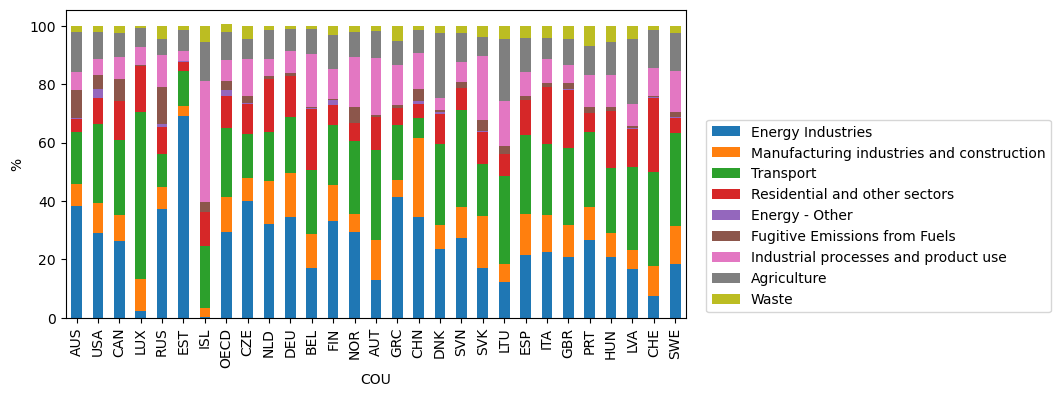

In [22]:
comp = percapita_table.iloc[:,np.r_[0,-9:-0]]

ax = comp.plot(kind = 'bar', x='COU', stacked=True,figsize=[8,4], ylabel="%")
ax.legend(loc='right',bbox_to_anchor=(1.6,0.33)) 
plt.show()

The profiles do not reveal any remarkable trends. All countries have varying amounts of emissions from the energy industry (which includes electricity generation), industrial processes, agriculture, and transport. 

## V.	Which countries have had the largest GHG emission reductions from 1990 to 2018?

Now we have an understanding of greenhouse gas emissions in their recent state. However, as countries look to reduce their emissions from previous levels, it would be helpful to analyse the change over time of greenhouse gas emissions. Which countries have had the largest reductions over the last three decades?

We will look at the change in emissions over time on both a per capita basis and a GDP-relative basis.

### Data Preparation

First, we must make time series for the data. 
We will also record these countries with complete data as "focus countries" which we will focus on in subsequent questions. 

In [23]:
def oecd_make_time_series(df,var): #Function for making time series from OECD data

    countries = df[df['VAR'] == var]['COU'].unique().tolist()


    time_series = pd.DataFrame()

    for cou in countries:
        country_line = df[(df['COU'] == cou) & (df['VAR'] == var)][['Year','Value']]
        country_line = country_line.set_index('Year')
        country_line = country_line.rename(columns={'Value':cou})
        
        time_series[cou] = country_line    
    
    return time_series

capita_time = oecd_make_time_series(oecd_emissions,'GHG_CAP')  
focus_countries = capita_time.columns.tolist() #Make list of focus countries

display(capita_time.iloc[0:5]) #Show first five rows for verification.

gdp_time = oecd_make_time_series(oecd_emissions,'GHG_GDP')  

display(gdp_time.iloc[0:5]) 



,AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,DEU,GRC,...,BRA,CHN,COL,CRI,IND,IDN,LVA,LTU,ZAF,ARG
Year,,,,,,,,,,,,,,,,,,,,,
1990,25.058,10.162,14.632,21.902,19.070,13.810,14.224,9.731,15.805,10.103,...,3.837,NaN,2.786,NaN,NaN,NaN,9.866,12.991,9.248,6.729
1991,24.784,10.570,14.855,21.330,17.299,15.836,13.718,10.168,15.126,10.021,...,3.896,NaN,2.825,NaN,NaN,NaN,9.214,13.527,NaN,6.941
1992,24.722,9.644,14.758,21.700,16.665,14.627,13.363,9.920,14.410,10.039,...,3.892,NaN,2.911,NaN,NaN,NaN,7.500,8.352,NaN,6.957
1993,24.462,9.601,14.601,21.544,15.919,14.989,13.740,9.489,14.215,9.893,...,3.910,NaN,2.903,NaN,NaN,NaN,6.288,6.738,NaN,7.023
1994,24.196,9.565,15.002,22.050,15.192,15.674,14.757,9.359,13.909,10.051,...,3.964,3.302,2.887,NaN,1.289,NaN,5.627,6.389,9.215,7.049


,AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,DEU,GRC,...,BRA,CHN,COL,CRI,IND,IDN,LVA,LTU,ZAF,ARG
Year,,,,,,,,,,,,,,,,,,,,,
1990,0.866,0.337,0.492,0.705,0.977,0.418,0.507,0.330,0.519,0.500,...,0.354,NaN,0.370,NaN,NaN,NaN,NaN,NaN,0.973,0.550
1991,0.864,0.341,0.492,0.711,1.003,0.474,0.522,0.342,0.475,0.485,...,0.378,NaN,0.372,NaN,NaN,NaN,0.609,1.100,NaN,0.590
1992,0.839,0.307,0.483,0.725,0.972,0.431,0.529,0.330,0.446,0.487,...,0.378,NaN,0.375,NaN,NaN,NaN,0.566,0.722,NaN,0.535
1993,0.807,0.306,0.485,0.710,0.928,0.443,0.551,0.319,0.447,0.494,...,0.388,NaN,0.360,NaN,NaN,NaN,0.764,0.686,NaN,0.492
1994,0.777,0.300,0.484,0.703,0.861,0.442,0.572,0.308,0.429,0.497,...,0.382,1.487,0.345,NaN,0.723,NaN,0.710,0.736,1.052,0.474


Next, we will make tables that summarise the time series. These will be data frames that show the figure in 1990, 2018, and the rate of change. 
Only countries with data for 1990 and 2018 will be shown in these tables. 

In [24]:
def rate_of_change(df,yrmin='1990',yrmax='2018',): #Function to make change summary table
    new_df = df.transpose()
    new_df = new_df.rename_axis('Country')
    new_df.columns = new_df.columns.astype(str)
    new_df['Change (%)'] = (new_df[yrmax] / new_df[yrmin] - 1) * 100
    
    new_df = new_df[[yrmin,yrmax,'Change (%)']]
    new_df = new_df.dropna().sort_values(by='Change (%)')
    return new_df

capita_change = rate_of_change(capita_time)
display(capita_change.iloc[0:5])
gdp_change = rate_of_change(gdp_time)
display(gdp_change.iloc[0:5])

Year,1990,2018,Change (%)
Country,,,
GBR,13.964,6.940,-50.300773
LUX,33.372,17.455,-47.695673
LTU,12.991,7.235,-44.307598
SVK,13.847,7.944,-42.630173
EST,25.732,15.099,-41.322089


Year,1990,2018,Change (%)
Country,,,
IRL,0.733,0.181,-75.306958
SVK,0.984,0.256,-73.983740
LUX,0.648,0.198,-69.444444
POL,1.255,0.391,-68.844622
GBR,0.537,0.177,-67.039106


### Analysis

Let's look at how the countries have reduced their per capita emissions over time.

Year,1990,2018,Change (%)
Country,,,
GBR,13.964,6.940,-50.300773
LUX,33.372,17.455,-47.695673
LTU,12.991,7.235,-44.307598
SVK,13.847,7.944,-42.630173
EST,25.732,15.099,-41.322089
LVA,9.866,6.075,-38.424894
SWE,8.253,5.159,-37.489398
DNK,13.810,8.639,-37.443881
CZE,19.070,11.950,-37.336130


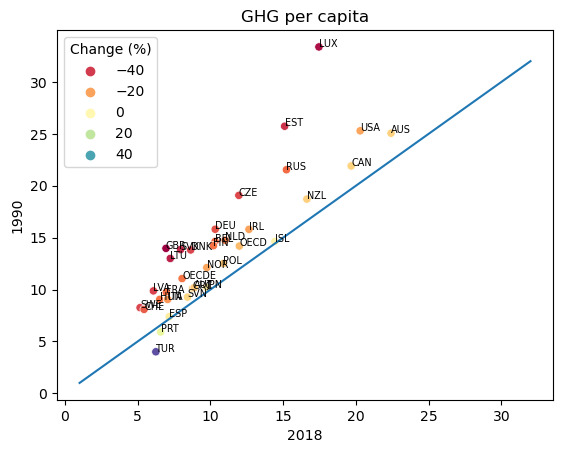

In [25]:
display(capita_change)

fig, ax = plt.subplots()

sns.scatterplot(
    data = capita_change,
    x = "2018",
    y = "1990",
    hue = 'Change (%)',
    palette = 'Spectral',
    ax=ax,
).set_title('GHG per capita')

plotlabels(capita_change,"2018","1990")

straightline = pd.DataFrame([{'2018':1,'1990':1}])
for i in range (2,int(capita_change[['1990','2018']].max().max())):
    straightline = straightline.append({'2018':i,'1990':i},ignore_index=True)

straightline.plot(
    kind='line',
    x='2018',
    y='1990',
    legend=False,
    ax=ax,
)

plt.show()


It seems most countries have reduced their per capita GHG emissions over time. In fact, only two (Portugal and Turkey) have increased their per capita emissions from 1990 to 2018. OECD nations have on average decreased their per capita emissions by 15.6%.

Let's use a plot with a regression trendline to see which countries did the best.

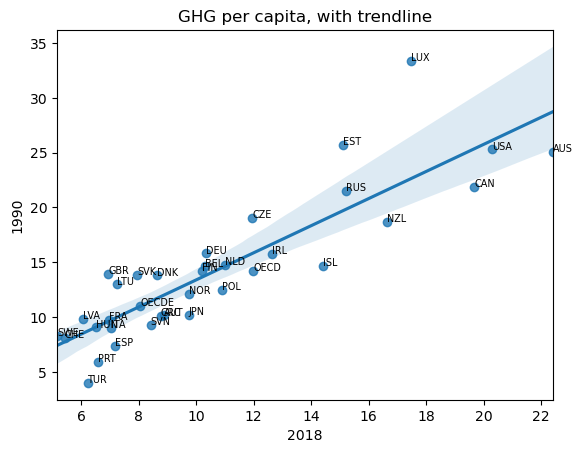

In [26]:
ax = sns.regplot(
    x = "2018",
    y = "1990",
    data = capita_change,
).set_title('GHG per capita, with trendline')

plotlabels(capita_change,"2018","1990")

plt.show()    


The UK (GBR), Estonia (EST) and Luxembourg (LUX) stand out as high performers in GHG reduction. 

Next, we will look at GHG emissions per unit of GDP (tons per USD$1,000).

Year,1990,2018,Change (%)
Country,,,
IRL,0.733,0.181,-75.306958
SVK,0.984,0.256,-73.983740
LUX,0.648,0.198,-69.444444
POL,1.255,0.391,-68.844622
GBR,0.537,0.177,-67.039106
CZE,0.977,0.368,-62.333675
HUN,0.600,0.239,-60.166667
SWE,0.277,0.111,-59.927798
DNK,0.418,0.184,-55.980861


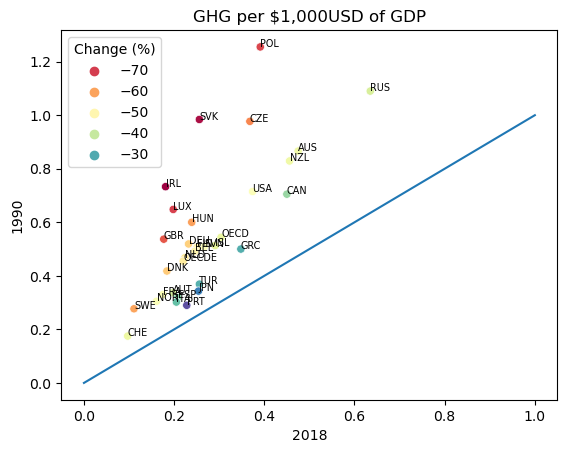

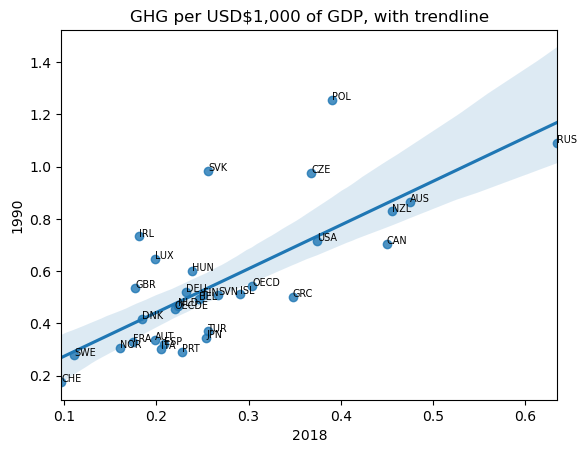

In [27]:
display(gdp_change)

fig, ax = plt.subplots()

sns.scatterplot(
    data = gdp_change,
    x = "2018",
    y = "1990",
    hue = 'Change (%)',
    palette = 'Spectral',
    ax=ax,
).set_title('GHG per $1,000USD of GDP')

plotlabels(gdp_change,"2018","1990")

straightline = pd.DataFrame([{'2018':1,'1990':1}])
for i in range (0,int(gdp_change[['1990','2018']].max().max())):
    straightline = straightline.append({'2018':i,'1990':i},ignore_index=True)

straightline.plot(
    kind='line',
    x='2018',
    y='1990',
    legend=False,
    ax=ax,
)

plt.show()

ax = sns.regplot(
    x = "2018",
    y = "1990",
    data = gdp_change,
).set_title('GHG per USD$1,000 of GDP, with trendline')

plotlabels(gdp_change,"2018","1990")

plt.show()  

Interestingly, it seems all countries here have been more economically productive at lower emissions, in particular Ireland (IRL), Slovakia (SVK), and Poland (POL). The OECD average decrease over this time period was a reduction of 44.1%.

It is good to see that most OECD nations have reduced their emissions on a per capita basis. The next line of investigation should then involve how they have been achieving this. In the next two questions, we will analyse some possible factors.  

## VI. Do either energy saving efforts or renewable energy adoption correlate with reduced GHG emissions?

First, we will look at energy use. Do the efforts to increase energy efficiency or conserve energy use correlate with the reduced emissions? How about increased renewable energy use?  Both are recognised as methods to reduce climate change, including by the UK Government (2020), which itself has proven to have made strong progress in reducing emissions in this analysis so far.

### Data Preparation

We will start by importing the data for per capita energy use and renewable energy use, both from Our World in Data (Ritchie & Roser, 2020). We will import the data into a time series dataframe, then make a table summary change similar to the ones above. First, we will manipulate the energy use data.

In [28]:
def wid_make_time_series(df,var): #Time series generator function for Our World in Data files.
    countries = focus_countries

    time_series = pd.DataFrame()

    for cou in countries:
        country_line = df[df['Code'] == cou][['Year',var]]
        country_line = country_line.set_index('Year')
        country_line = country_line.rename(columns={var:cou})
        
        time_series = pd.concat([time_series, country_line],axis=1)

    #time_series = time_series.index.map(str)    
    return time_series

energy_use = pd.read_csv("OWID_per-capita-energy-use.csv")
display(energy_use.iloc[0:5])

energy_ts = wid_make_time_series(energy_use,"Energy consumption per capita (kWh)")
energy_ts = energy_ts.dropna(axis=1) #Drop countries for which data is incomplete.
display(energy_ts.iloc[0:5])

energy_ts_chg = rate_of_change(energy_ts)
display(energy_ts_chg.iloc[0:5])


,Entity,Code,Year,Energy consumption per capita (kWh)
0,Afghanistan,AFG,1980,581.932
1,Afghanistan,AFG,1981,662.913
2,Afghanistan,AFG,1982,709.075
3,Afghanistan,AFG,1983,877.846
4,Afghanistan,AFG,1984,905.948


,AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,DEU,GRC,...,USA,CHL,ISR,BRA,CHN,COL,IND,IDN,ZAF,ARG
Year,,,,,,,,,,,,,,,,,,,,,
1965,35831.143,25546.361,43720.119,69689.573,47740.147,34916.791,24891.100,26692.962,38899.306,9345.008,...,72921.760,8044.104,18663.233,3229.991,2115.707,4713.615,1234.199,839.648,18273.003,14134.990
1966,38356.584,26553.225,41922.790,72852.688,48050.901,39419.286,28270.003,27049.266,38711.866,10169.623,...,76198.585,8470.843,19014.661,3428.117,2243.058,4988.245,1245.658,810.200,17921.499,14387.895
1967,39631.108,26658.370,43824.845,74897.066,47326.145,39345.851,29672.737,28572.823,38346.579,11151.538,...,78075.334,8488.442,19394.678,3457.090,1963.852,5161.010,1257.530,778.529,18187.411,14597.980
1968,40942.409,28357.900,48648.337,78410.062,49411.667,40826.809,32248.856,29924.131,40685.977,11540.814,...,82061.023,8327.370,19882.142,3850.237,1929.150,5288.892,1315.776,807.458,18704.228,14882.056
1969,41597.247,29272.712,53201.325,81727.541,51536.846,46548.854,35503.873,32749.472,43661.954,12114.427,...,85676.867,8822.872,20251.118,4096.666,2284.183,5239.363,1427.496,887.349,18762.157,15164.666


Year,1990,2018,Change (%)
Country,,,
SVK,46765.891,34563.497,-26.092508
GBR,43814.582,32950.188,-24.796297
CHE,48805.307,36751.572,-24.697591
SWE,77557.863,60350.691,-22.186238
LUX,97208.265,76501.105,-21.301851


Now, we will do the same for the renewable energy use data.

In [29]:
renewables = pd.read_csv("OWID_per-capita-renewables.csv")
renewables = renewables.replace(0,np.nan) #Converts 0 values to null values
renew_ts = wid_make_time_series(renewables,"Renewables per capita (kWh)")
renew_ts = renew_ts.dropna(axis=1)
display(renew_ts.iloc[0:5])

renew_ts_chg = rate_of_change(renew_ts,'1990','2018')
renew_ts_chg = renew_ts_chg.sort_values(by='Change (%)',ascending=False)
display(renew_ts_chg.iloc[0:5])

,AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,DEU,GRC,...,GBR,USA,CHL,BRA,CHN,COL,IND,IDN,ZAF,ARG
Year,,,,,,,,,,,,,,,,,,,,,
1965,1.960813,6.115679,0.080004,16.711967,0.631887,0.014589,5.686597,2.671454,0.590547,0.263189,...,0.236189,2.952628,1.221729,0.850086,0.084754,0.525731,0.106670,0.050565,0.005302,0.153555
1966,1.827983,6.548110,0.087528,18.216319,0.594994,0.015059,6.294608,2.967663,0.634022,0.566026,...,0.230901,2.944298,1.264917,0.904544,0.084132,0.567258,0.109095,0.063987,0.005028,0.153251
1967,1.843089,6.646093,0.069379,18.303144,0.536463,0.014372,7.039359,2.572551,0.597961,0.540703,...,0.247315,3.287132,1.269271,0.920994,0.070606,0.614597,0.119553,0.069923,0.003539,0.154652
1968,1.871977,6.789507,0.070853,18.299088,0.415546,0.011988,6.342148,2.851277,0.602999,0.443459,...,0.187526,3.289248,1.045811,0.938865,0.081024,0.666184,0.135092,0.084075,0.003183,0.179606
1969,1.989227,6.209243,0.066551,19.901984,0.339299,0.012474,5.279928,2.977462,0.486743,0.662681,...,0.163352,3.641865,1.161328,0.979128,0.080162,0.721301,0.146793,0.085569,0.002714,0.158744


Year,1990,2018,Change (%)
Country,,,
BEL,0.154059,4.188777,2618.943392
DNK,0.458353,9.036414,1871.496641
HUN,0.052199,0.957748,1734.801433
POL,0.107716,1.698895,1477.198374
GBR,0.278196,4.297396,1444.736804


Next, we will summarise the change values into one dataframe. 

In [30]:
allfactors = capita_change['Change (%)'].to_frame(name='GHG Change (%)')

def merge_change_vals(result,source,columnname):
    new_df = pd.merge(result,source['Change (%)'].to_frame(name=columnname),left_index=True,right_index=True,how="left")
    return new_df 

allfactors = merge_change_vals(allfactors, energy_ts_chg, 'Energy Use Change (%)')
allfactors = merge_change_vals(allfactors, renew_ts_chg, 'Renewables Change (%)')

allfactors.head()

,GHG Change (%),Energy Use Change (%),Renewables Change (%)
Country,,,
GBR,-50.300773,-24.796297,1444.736804
LUX,-47.695673,-21.301851,369.463622
LTU,-44.307598,NaN,NaN
SVK,-42.630173,-26.092508,167.960189
EST,-41.322089,NaN,NaN


### Analysis

Let's see how energy use and renewable use correlated overall with GHG change.

,GHG Change (%),Energy Use Change (%),Renewables Change (%)
Country,,,
GBR,-50.300773,-24.796297,1444.736804
LUX,-47.695673,-21.301851,369.463622
SVK,-42.630173,-26.092508,167.960189
SWE,-37.489398,-22.186238,0.797245
DNK,-37.443881,-13.819994,1871.496641
CZE,-37.336130,-14.787317,602.719117
DEU,-34.666245,-15.059342,975.383874
CHE,-32.768431,-24.697591,-11.133941
BEL,-29.496993,-0.099785,2618.943392


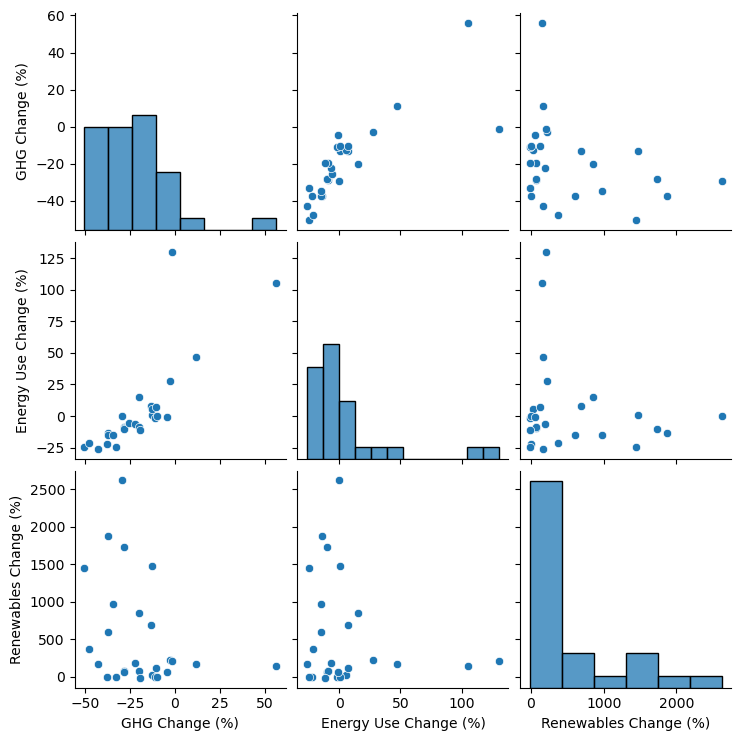

,GHG Change (%),Energy Use Change (%),Renewables Change (%)
GHG Change (%),1.000000,0.791072,-0.305085
Energy Use Change (%),0.791072,1.000000,-0.158887
Renewables Change (%),-0.305085,-0.158887,1.000000


In [31]:
display(allfactors.dropna())

sns.pairplot(data = allfactors)
plt.show()

display(allfactors.corr())

Reductions in energy use are well correlated with the change in GHG emissions. The adoption of renewable energy, on the other hand, shows little correlation. 

## VII.	Do either reduced road use or increased efficiency (lower fuel consumption) of road vehicles correlate with reduced GHG emissions? 

Another common theme of reducing greenhouse gas emissions is reducing car use. An alternative to reducing use outright is car use is the production of more fuel-efficient vehicles and vehicles that use no fuel, such as electric vehicles. The UK Government here is also implementing such measures (2020).

The specific indicators we will look at come from OECD data (2021c). We will look at the number of road motor vehicles per one million persons, and the motor fuel deliveries per road motor vehicle, measured in tons of fuel. 

### Data Preparation

We will create the data in a similar fashion to the previous question. 
As the range of data is more limited, the start and end years will be modified.

In [32]:
car_use = pd.read_csv("OECD_ITF_equipment.csv")

car_use_ts = oecd_make_time_series(car_use,"IND-EQUI-MOTVEH-PC")
display(car_use_ts.iloc[0:5])

car_use_ts_chg = rate_of_change(car_use_ts,"2000","2018")
display(car_use_ts_chg.iloc[0:5])

fuelpercar = pd.read_csv("OECD_ITF_environment.csv")

fuelpercar_ts = oecd_make_time_series(fuelpercar,"IND-ENE-FUEL-VEH")
display(fuelpercar_ts.iloc[0:5])

fuelpercar_ts_chg = rate_of_change(fuelpercar_ts,"2003","2018")
display(fuelpercar_ts_chg.iloc[0:5])

allfactors = merge_change_vals(allfactors, car_use_ts_chg, 'Car Use Change (%)')
allfactors = merge_change_vals(allfactors, fuelpercar_ts_chg, 'Fuel Per Car Change (%)')
display(allfactors.iloc[0:5])

,AUS,AUT,BEL,BGR,CAN,HRV,CZE,DNK,EST,FIN,...,GBR,USA,MKD,BIH,CHL,MEX,MNE,RUS,SRB,ISR
Year,,,,,,,,,,,,,,,,,,,,,
2000,646.008458,682.887715,559.443970,NaN,582.746443,NaN,452.069383,451.156038,NaN,499.593428,...,503.102992,769.159858,NaN,NaN,135.500793,157.855819,NaN,NaN,NaN,291.227540
2001,642.701643,693.956313,567.438903,NaN,583.542026,NaN,448.779218,454.207606,NaN,512.720875,...,516.156441,776.330179,NaN,NaN,136.853927,172.491013,NaN,NaN,NaN,297.390123
2002,652.472597,703.295006,572.352952,NaN,593.652841,NaN,460.923675,460.571388,NaN,520.324778,...,528.073893,784.649626,NaN,NaN,138.005838,184.733625,NaN,NaN,NaN,298.329224
2003,661.610221,667.247599,576.322605,NaN,596.289448,NaN,475.770154,464.143522,NaN,530.403333,...,537.088036,794.990325,NaN,NaN,138.544241,192.149437,NaN,NaN,NaN,296.320612
2004,672.367022,673.766876,581.702361,384.262511,597.389127,NaN,481.803603,466.461147,NaN,549.522854,...,552.077956,812.652645,NaN,NaN,143.529451,199.765121,NaN,NaN,NaN,299.267881


Year,2000,2018,Change (%)
Country,,,
JPN,698.517064,722.904620,3.491333
LUX,730.951180,792.830002,8.465521
DEU,624.790875,681.001959,8.996784
CHE,671.190451,741.697672,10.504801
FRA,588.943156,651.863130,10.683539


,AUS,BEL,BGR,CAN,CZE,EST,FIN,FRA,DEU,HUN,...,SWE,CHE,TUR,GBR,USA,SRB,MEX,RUS,CHL,ISR
Year,,,,,,,,,,,,,,,,,,,,,
2003,2.012459,NaN,NaN,NaN,1.049485,NaN,1.359855,1.118885,NaN,1.018784,...,1.301290,1.031902,NaN,1.174616,NaN,NaN,2.429954,NaN,NaN,NaN
2004,2.012119,NaN,0.593532,2.249358,1.086912,NaN,1.357466,1.109720,0.967235,0.998487,...,1.327434,1.023851,NaN,1.147412,2.126506,NaN,2.443669,NaN,NaN,NaN
2005,1.963362,NaN,0.611156,2.273393,1.125841,NaN,1.303333,1.087788,0.939839,1.112760,...,1.340011,1.018962,NaN,1.129691,2.035069,NaN,2.442354,NaN,NaN,NaN
2006,1.953479,1.051032,0.953685,2.163449,1.124171,NaN,1.259615,1.080929,0.936441,1.159965,...,1.277623,1.022147,NaN,1.115383,1.996818,NaN,2.335065,NaN,NaN,NaN
2007,1.976311,NaN,0.780590,2.130336,1.111717,1.169578,1.251156,1.080581,0.928645,1.178793,...,1.301894,1.020437,NaN,1.115439,1.910033,NaN,2.299306,NaN,NaN,NaN


Year,2003,2018,Change (%)
Country,,,
FIN,1.359855,0.851867,-37.356028
JPN,0.868412,0.647327,-25.458552
ESP,1.054770,0.800820,-24.076333
SWE,1.301290,1.013997,-22.077507
GBR,1.174616,0.920106,-21.667505


,GHG Change (%),Energy Use Change (%),Renewables Change (%),Car Use Change (%),Fuel Per Car Change (%)
Country,,,,,
GBR,-50.300773,-24.796297,1444.736804,17.731064,-21.667505
LUX,-47.695673,-21.301851,369.463622,8.465521,9.607760
LTU,-44.307598,NaN,NaN,58.112715,96.310464
SVK,-42.630173,-26.092508,167.960189,NaN,NaN
EST,-41.322089,NaN,NaN,NaN,NaN


### Analysis

Let's look at how car use and fuel per car correlates with the reduction in GHG. 

,GHG Change (%),Car Use Change (%),Fuel Per Car Change (%)
Country,,,
GBR,-50.300773,17.731064,-21.667505
LUX,-47.695673,8.465521,9.607760
LTU,-44.307598,58.112715,96.310464
SWE,-37.489398,14.013630,-22.077507
CZE,-37.336130,53.700006,-16.532206
CHE,-32.768431,10.504801,-20.202845
FRA,-28.496557,10.683539,-14.868771
FIN,-28.255062,72.961906,-37.356028
HUN,-28.075989,70.532908,14.201105


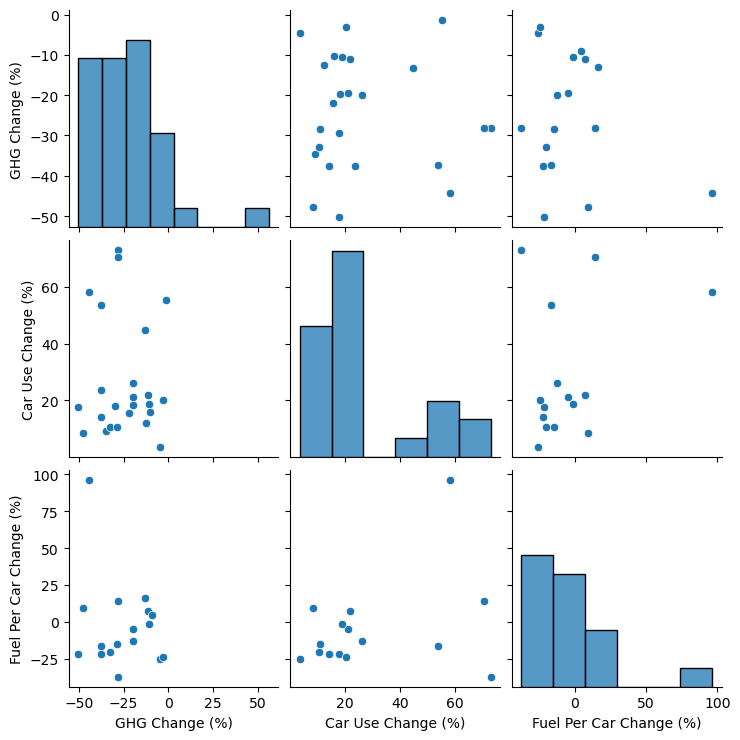

,GHG Change (%),Energy Use Change (%),Renewables Change (%),Car Use Change (%),Fuel Per Car Change (%)
GHG Change (%),1.000000,0.791072,-0.305085,-0.053163,-0.214174
Energy Use Change (%),0.791072,1.000000,-0.158887,0.310317,0.029647
Renewables Change (%),-0.305085,-0.158887,1.000000,0.175971,0.436701
Car Use Change (%),-0.053163,0.310317,0.175971,1.000000,0.315632
Fuel Per Car Change (%),-0.214174,0.029647,0.436701,0.315632,1.000000


In [33]:
roadfactors = allfactors[["GHG Change (%)","Car Use Change (%)","Fuel Per Car Change (%)"]]

display(roadfactors.dropna())

sns.pairplot(data = roadfactors)
plt.show()

display(allfactors.corr())

It appears that the OECD countries have not significantly altered their use of motor vehicles in the same way they have invested in energy conservation or renewable energy. In fact, no country has decreased car usage, and fuel usage per vehicle has only decreased in some countries. 
It is, therefore, no surprise that reductions in either car use or fuel per car seems to have much correlation with GHG reductions.

Does this mean that road vehicle use is unimportant? As supplementary analysis, we will quickly compare the recent car use and fuel use with the GHG per capita

,COU,"GHG Per Capita (CO2e, t)",Car Use,Fuel Use
1,AUS,22.413,767.462612,1.989227
44,USA,20.290,909.257315,1.364449
5,CAN,19.672,676.252305,1.903800
30,LUX,17.455,792.830002,3.734432
35,NZL,16.627,821.185499,1.368430
39,RUS,15.220,395.326045,1.010753
15,EST,15.099,686.699542,NaN
24,ISL,14.425,955.429362,NaN
28,KOR,13.614,479.729187,1.045962
23,IRL,12.645,558.361528,1.582207


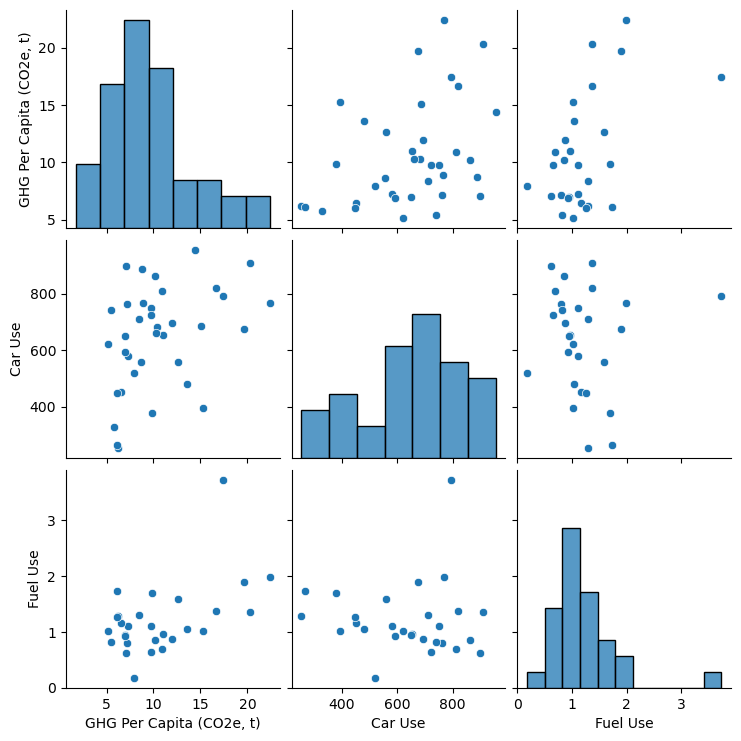

,"GHG Per Capita (CO2e, t)",Car Use,Fuel Use
"GHG Per Capita (CO2e, t)",1.000000,0.380858,0.509030
Car Use,0.380858,1.000000,-0.020663
Fuel Use,0.509030,-0.020663,1.000000


In [34]:
latest_data["Car Use"] = ""
latest_data["Fuel Use"] = ""
for row in range(0,len(latest_data.index)): 
    #Match appropriate data with values in year and country code column in the latest data column. 
    cou = latest_data.at[row,'COU']
    year = latest_data.at[row,'Year']
    try:
        target_car = car_use_ts.at[year,cou]
    except:
        target_car = np.nan #Give null value if data cannot be found.
    try:
        target_fuel = fuelpercar_ts.at[year,cou]
    except:
        target_fuel = np.nan
    latest_data.at[row,"Car Use"] = target_car
    latest_data.at[row,"Fuel Use"] = target_fuel
latest_data["Car Use"] = pd.to_numeric(latest_data["Car Use"],errors='coerce')
latest_data["Fuel Use"] = pd.to_numeric(latest_data["Fuel Use"],errors='coerce')

ghg_vs_car = latest_data[['COU','GHG Per Capita (CO2e, t)','Car Use','Fuel Use']].sort_values(by='GHG Per Capita (CO2e, t)',ascending=False)

display(ghg_vs_car)

sns.pairplot(data=ghg_vs_car)
plt.show()

display(ghg_vs_car.corr())

The coefficients here still show weak correlation, though they are higher than those for the changes. It is definitely possible that reducing car and fuel use can reduce GHG emissions, but it does not seem to be a major factor that differentiates OECD nations. 

## VIII. Of these efforts in Questions VI and VII, which were used by the countries with the largest reductions in GHG emissions?

Let's look at some of the countries that have had the most success in reducing GHG emissions. We will look at the five countries with the highest reductions for which the most data is available, and look at the changes in energy use, renewable energy use, car use, and fuel use. 

### Data Preparation

We will get the top five countries for which all change data is available.

In [35]:
top5 = allfactors.dropna()
top5 = top5.iloc[0:5,:]

top5list = top5.index.tolist() #Store the top 5 country codes in a list.


### Analysis

Now, we will show the changes in bar charts.

,GHG Change (%),Energy Use Change (%),Renewables Change (%),Car Use Change (%),Fuel Per Car Change (%)
Country,,,,,
GBR,-50.300773,-24.796297,1444.736804,17.731064,-21.667505
LUX,-47.695673,-21.301851,369.463622,8.465521,9.607760
SWE,-37.489398,-22.186238,0.797245,14.013630,-22.077507
CZE,-37.336130,-14.787317,602.719117,53.700006,-16.532206
CHE,-32.768431,-24.697591,-11.133941,10.504801,-20.202845


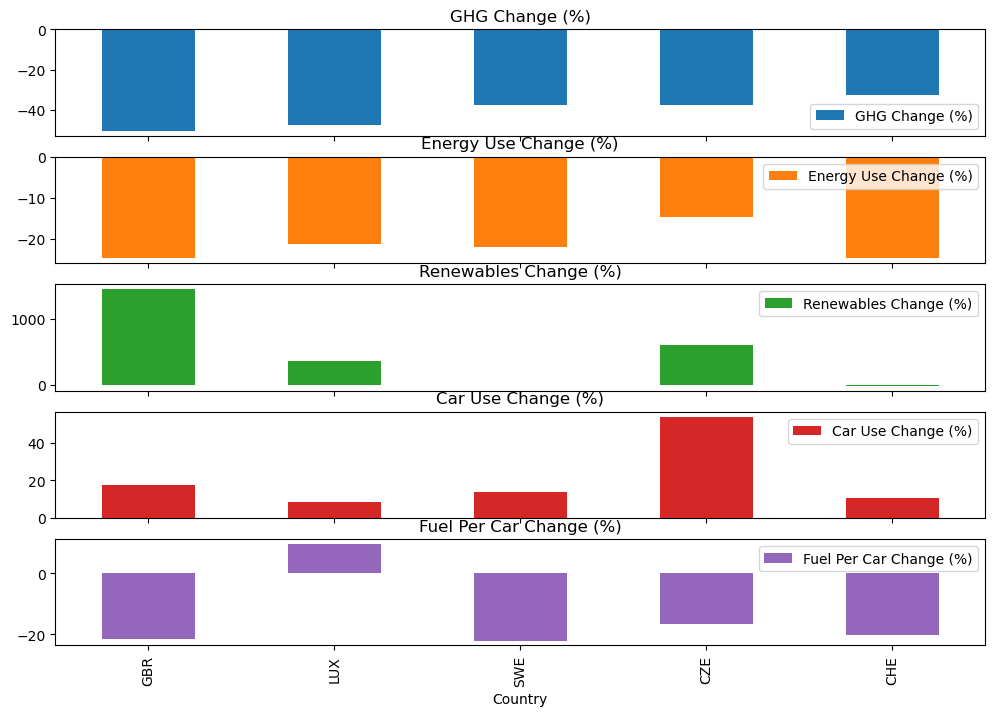

In [36]:
display(top5)
top5.plot(kind='bar',subplots=True,figsize=[12,8])
plt.show()

The top five are: The United Kingdom (GBR), Luxembourg (LUX), Sweden (SWE), the Czech Republic (CZE), and Switzerland (CHE).

As the previous analysis suggests, all countries can attribute their GHG reduction to saving and increasing the efficiency of energy. All countries have also increased their renewable energy usage. although there is considerable variation. Sweden's change was only negligible (0.8%), while the UK had increased their renewable energy usage by over 1400%. No country produced results in decreasing car use, however all except for Luxembourg did increase per vehicle fuel efficiency by 16-22%.  

Let's look at the factors over time for each country. We will invert renewable use for consistency (i.e. all lines should be going down for reduced GHG emissions).

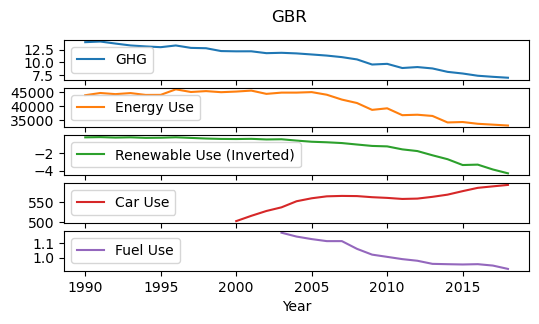

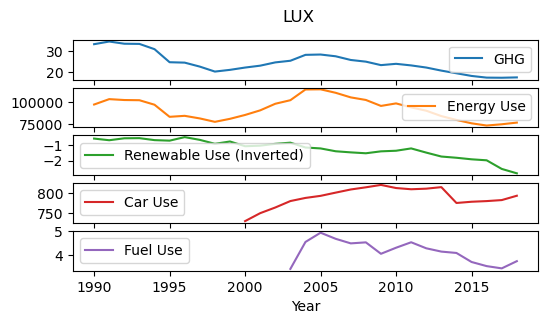

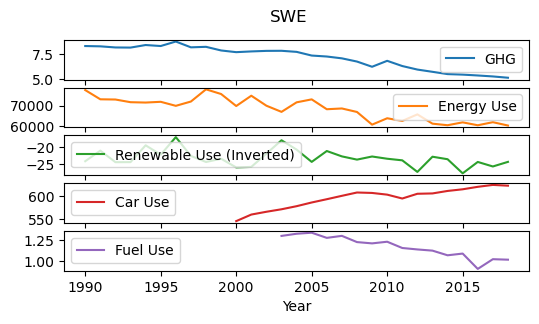

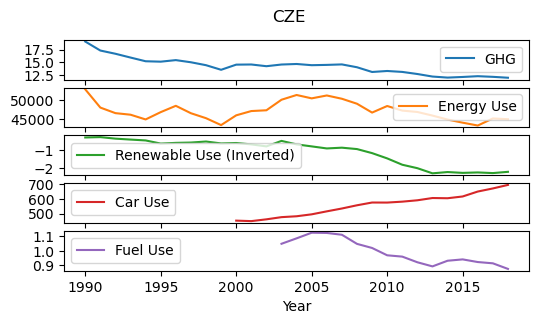

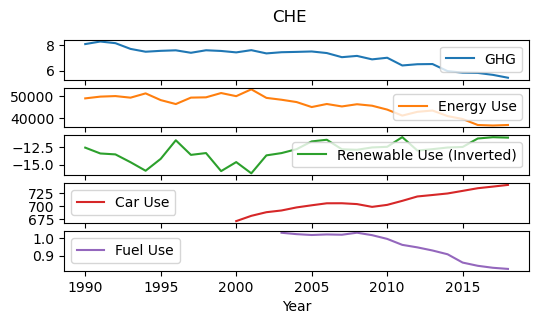

In [37]:
for country in top5list:
    top5charts = pd.DataFrame()
    top5charts['GHG'] = capita_time[country] 
    top5charts['Energy Use'] = energy_ts[country] 
    top5charts['Renewable Use (Inverted)'] = 0 - renew_ts[country] 
    top5charts['Car Use'] = car_use_ts[country] 
    top5charts['Fuel Use'] = fuelpercar_ts[country] 
    top5charts.plot(subplots=True,title=country,figsize=[6,3])
    plt.show()

Energy use and fuel use generally go down with the total GHG. Car use does not (and in fact goes up in all cases). Renewable use is consistent with GHG for the UK, Luxembourg, and the Czech Republic, but has a weak correlation for Sweden and is inconsistent with Switzerland.

# Discussion and Conclusion

It is vital to the future of the planet that greenhouse gas emissions be reduced and climate change mitigated. The world is already on track to reach dangerous levels of global warming (Chestney & Januta, 2021). The OECD and other major of the world emit greenhouse gases at rates much higher than other countries (OECD, 2021b) and it is important that countries bring down not only their total emissions, but also the emissions each person in major nations emit. 

The analysis has shown little correlation in per capita greenhouse gas emissions with the GDP per capita or the population density of a country. This suggests that reducing emissions need not require reducing the economic productivity of the people. Countries with lower GHG emissions per capita do not share any particular profile whereby they emit less from transport, electricity, or any particular sector.  Furthermore, while it is debatable whether the emissions reductions are sufficient enough to reduce climate change (Abnett, 2021), most OECD nations have made reductions in GHG emissions per capita, and several have made significant reductions, as much as by one third to one half in the period from 1990 to 2018. 

The reductions in this timeframe appear to be mostly correlated with a lower energy use per capita. This means that efforts to improve the efficiency of energy use have brought the strongest results so far. Such contributions include improving energy efficiency of buildings (The Government of the United Kingdom, 2020) and improving the efficiency of appliances and equipment, an initiative that many OECD countries have taken up  (ACEEE, AEEE, ECEEE, 2019). Renewable energy is another contributor, however while its adoption over the past three decades has shown results especially in the top GHG emission reducers, there is not as much correlation between per capita emissions reductions as there is with energy conservation. As top reducers have increased their renewable energy consumption as much as 14 fold, it is possible that stronger investment in renewable energy by other countries could drive further reductions. 
 
The emissions reductions over the timeframe concerned do not correlate with car usage, which has in fact risen across all countries for which relevant data could be found. Fuel consumption per motor vehicle has decreased in some countries, but the correlation is weak. It would appear that road transport in particular is currently a small factor in reducing climate change emissions. However, with all transport accounting for 23% of OECD member’s GHG emissions on average, it is still worth pursuing. According to the International Energy Agency, zero-emission electric vehicles only made up for 2.5% of all car sales worldwide (2021). As electric vehicles become more widespread, it is possible that they will lead to more significant reductions in the future. 

The top reducers have made reductions in energy use and motor fuel use, and  significantly increased their use of renewable energy in most cases. Other countries are encouraged look to these methods, in particular energy conservation and efficiency, to reduce their GHG emissions. 


# Future Analysis

As mentioned in the Discussion and Conclusion, one possible reason that correlations are weak between certain factors, such as reduced motor fuel use, is that the adoption is not significantly advanced enough. Further analysis in these areas is encouraged. 

The COVID-19 pandemic has significantly affected industries and transportation habits of people worldwide in 2020 onward. Data from BP already suggests that global carbon emissions fell by 6.3% in 2020 (BP, 2021, p. 15). New living trends including telecommuting, as well as reduced flight use, likely contributed strongly to these emissions (Jiang, et al., 2021). For the purpose of GHG reductions, it would be beneficial to analyse the impact and long-term viability of these measures on emissions so that environmentally successful initiatives could be maintained. 

Finally, more detailed analysis of energy use across various sectors could better identify other possibilities in reducing greenhouse gas emissions. Such possibilities include looking at which renewable energies are the best contributors to GHG emission reductions. Another such possibility is analysing air transport. Due to the popular focus on electric vehicle and reducing car usage (The Government of the United Kingdom, 2020) (Niranjan, 2019), road transport was the primary focus for this analysis. However, aviation is a potentially significant contributor, the emissions of which accounting for 3.8% of global CO2 emissions in the EU in 2018 and previously forecasted (before the pandemic) to triple (European Commission, 2021). Detailed data analysis can provide invaluable insight into methods of reducing global emissions and mitigating climate change.


# References

References
Abnett, K. V. V., 2021. "Flurry of emissions pledges still not enough to meet global climate goals". *Reuters*. [Online] 
Available at: https://www.reuters.com/business/sustainable-business/flurry-emissions-pledges-still-not-enough-meet-global-climate-goals-2021-08-05/
[Accessed 15 Aug 2021].

ACEEE, AEEE, ECEEE, 2019. *12 strategies to step up global energy efficiency*. [Online] 
Available at: https://www.eceee.org/static/media/uploads/site-2/policy-areas/globalaction/12-eestrategiesfor-ieahighlevel-enrev.pdf
[Accessed 21 Aug 2021].

BP, 2021. *bp Statistical Review of World Energy*, London: BP.

Chestney, N. & Januta, A., 2021. "U.N. climate change report sounds 'code red for humanity'". *Reuters*. [Online] 
Available at: https://www.reuters.com/business/environment/un-sounds-clarion-call-over-irreversible-climate-impacts-by-humans-2021-08-09/
[Accessed 14 Aug 2021].

Deutsche Welle, 2021. "Turkish Republic of Northern Cyprus". *Deutsche Welle*. [Online] 
Available at: https://www.dw.com/en/turkish-republic-of-northern-cyprus/t-18943633
[Accessed 15 Aug 2021].

Dietz, T. & Rosa, E. A., 1997. "Effects of population and affluence on CO2 emissions". *Proceedings of the National Academy of Sciences of the United States of America*, 94(1), pp. 175-179.
European Commission, 2021. Reducing emissions from aviation. [Online] 
Available at: https://ec.europa.eu/clima/policies/transport/aviation_en
[Accessed 15 Aug 2021].

Geneva College, 2021. *Energy Use and Conservation.* [Online] 
Available at: https://www.geneva.edu/community/environmental-stewardship/energy_use_conservation
[Accessed 15 Aug 2021].

IEA, 2021. *Global EV Data Explorer.* [Online] 
Available at: https://www.iea.org/articles/global-ev-data-explorer
[Accessed 15 Aug 2021].

Iorifan, o., 2021. "wrong country code ISO_3 for France in naturalearth_lowres dataset #1041". *GitHub* [Online] 
Available at: https://github.com/geopandas/geopandas/issues/1041
[Accessed 12 Aug 2021].

IPCC, 2021. *Climate change widespread, rapid, and intensifying – IPCC*. [Online] 
Available at: https://www.ipcc.ch/2021/08/09/ar6-wg1-20210809-pr/
[Accessed 14 Aug 2021].

ISO, 2021. *ISO 3166 Country Codes*. [Online] 
Available at: https://www.iso.org/iso-3166-country-codes.html
[Accessed 15 Aug 2021].

Jiang, P., Fan, Y. V. & Klemeš, J. J., 2021. "Impacts of COVID-19 on energy demand and consumption: Challenges, lessons and emerging opportunities". *Appl Energy*, 9 Jan.285(116441).

Niranjan, A., 2019. "Climate Solutions: Technologies to slow climate change". *Deutsche Welle* [Online] 
Available at: https://www.dw.com/en/climate-solutions-technologies-to-slow-climate-change/a-51660909
[Accessed 15 Aug 2021].

OECD, 2021a. "Agri-Environmental other indicators: Greenhouse gas emissions". *OECD.Stat*  [Online] 
Available at: https://stats.oecd.org/
[Accessed 12 Aug 2021].

OECD, 2021b. *Climate Change*. [Online] 
Available at: https://www.oecd-ilibrary.org/sites/5584ad47-en/index.html?itemId=/content/component/5584ad47-en
[Accessed 14 Aug 2021].

OECD, 2021c. "Data from ITF/Eurostat/UNECE questionnaire: Performance indicators". *OECD.Stat* [Online] 
Available at: https://stats.oecd.org/
[Accessed 14 Aug 2021].

Quince, A. & Phillips, K., 2015. "A global history of emissions reduction schemes". *ABC Radio National* [Online] 
Available at: https://www.abc.net.au/radionational/programs/rearvision/a-global-history-of-carbon-reduction-schemes/6583580
[Accessed 14 Aug 2021].

Ritchie, H. & Roser, M., 2020. "Energy". *Our World in Data* [Online] 
Available at: https://ourworldindata.org/energy
[Accessed 14 Aug 2021].

The Government of the United Kingdom, 2020. "The Ten Point Plan for a Green Industrial Revolution". [Online] 
Available at: https://www.gov.uk/government/publications/the-ten-point-plan-for-a-green-industrial-revolution/title
[Accessed 13 Aug 2021].

The World Bank, 2021. *DataBank World Development Indicators*. [Online] 
Available at: https://databank.worldbank.org/source/world-development-indicators?savedlg=1&l=en#
[Accessed 13 Aug 2021].

UNFCCC, 2016. *The Paris Agreement*. [Online] 
Available at: https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement
[Accessed 14 Aug 2021].

WWF-UK, 2021. *Reducing Carbon Emissions in the UK*. [Online] 
Available at: https://www.wwf.org.uk/what-we-do/projects/reducing-carbon-emissions-uk
[Accessed 13 Aug 2021].

